In [1]:
import jieba
import matplotlib.pyplot as plt
from wordcloud import WordCloud, ImageColorGenerator
import csv
from PIL import Image
from imageio import imread

In [2]:
area = ["信義區", "士林區", "北投區", "中山區", "大同區", "松山區", "內湖區", "中正區", "萬華區", "大安區", "文山區", "南港區"]
for word in area:
    jieba.add_word(word)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\asus\AppData\Local\Temp\jieba.cache
Loading model cost 0.977 seconds.
Prefix dict has been built succesfully.


In [12]:
# 打開停用字
with open("104_stopwords.txt", "r", encoding="utf8") as file:
    stop_words = file.read()
with open("104_crawler.csv", "r", encoding = "utf8") as f:
    rows = csv.DictReader(f)
    tmp = []
    tmp0 = []
    for row in rows:
        seg = jieba.cut(row["Address"], cut_all = False)
        for word in seg:
            if word not in stop_words:
                tmp.append(word)
        
        seg_cont = jieba.cut(row["Content"], cut_all = False)
        for word in seg_cont:
            if word not in stop_words:
                tmp0.append(word)
        
        seg_ot = jieba.cut(row["Other"], cut_all = False)
        for word in seg_ot:
            if word not in stop_words:
                tmp0.append(word)        
    text = " ".join(tmp)
    text0 = " ".join(tmp0)


In [4]:
wc = WordCloud(
    background_color="white", # 背景顏色 
    max_words=200,
    font_path="C:\Windows\Fonts\kaiu.ttf", # 設置字體不然會出現亂碼
    random_state=36, # 多少種配色方案
    width=600,
    height=400
).generate(text)

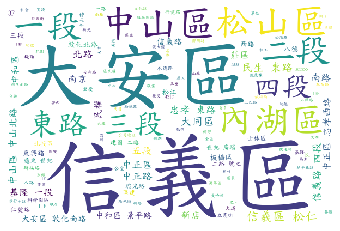

In [5]:
plt.imshow(wc)
plt.axis("off")
plt.show()
# 輸出檔案
wc.to_file("job_addr.png")

In [13]:
wc0 = WordCloud(
    background_color="white", # 背景顏色 
    max_words=200,
    font_path="C:\Windows\Fonts\kaiu.ttf", # 設置字體不然會出現亂碼
    random_state=36, # 多少種配色方案
    width=600,
    height=400
).generate(text0)

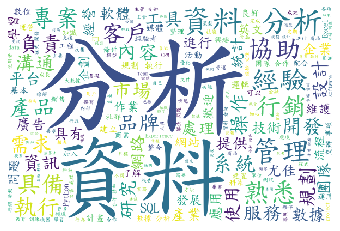

In [14]:
plt.imshow(wc0)
plt.axis("off")
plt.show()
# 輸出檔案
wc0.to_file("job_skill.png")